# Dependencies

In [ ]:
#these are the library we used in program

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

Using TensorFlow backend.


# Load Data

In [ ]:
data = pd.read_csv("/content/drive/My Drive/madam/Wind.zip (Unzipped Files)/Wind/T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


# Rename colum names

In [ ]:

data.rename(columns = {'LV ActivePower (kW)':'feature1', 'Wind Speed (m/s)':'feature2',
'Theoretical_Power_Curve (KWh)':'Target','Wind Direction (°)':'feature3'}, inplace = True)
data.head() 

,Date/Time,feature1,feature2,Target,feature3
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


# Checking null values in columns

In [ ]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Series([], dtype: float64)

# corelation matrix

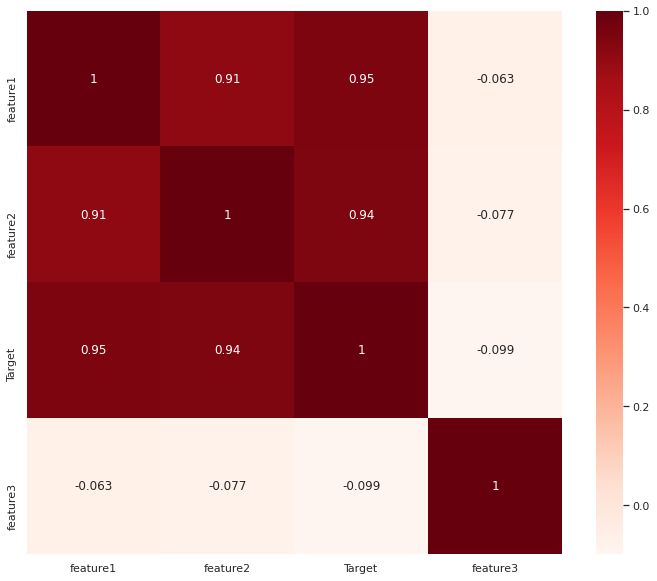

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.savefig('correlation_matrix.jpg')
plt.show()

# corelation between individual feature and target 

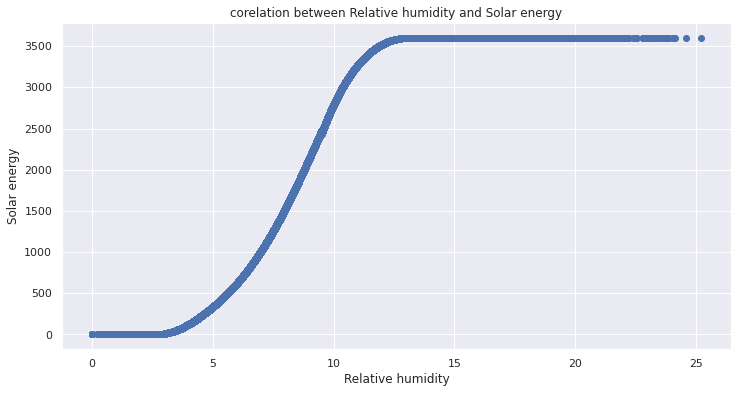

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(data['feature2'],data['Target'],cmap='plasma')
plt.title('corelation between Relative humidity and Solar energy')
plt.xlabel('Relative humidity')
plt.ylabel('Solar energy')
plt.savefig('correlation.jpg')

In [ ]:
#these line of code is used to convert time column from time format to numerical format
data['Year']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[0])
data['Month']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[1])
data['Day']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[2])
data['Time_Hours']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[3])
data['Time_Minutes']=data['Date/Time'].apply(lambda x: time.strptime(x,"%d %m %Y %H:%M")[4])
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data.head()

,Date/Time,feature1,feature2,Target,feature3,Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40


# Dropping irrelevent feature

In [ ]:
print(data.columns)
data = data.drop(['Date/Time'], 1)
data.columns

Index(['Date/Time', 'feature1', 'feature2', 'Target', 'feature3', 'Year',
       'Month', 'Day', 'Time_Hours', 'Time_Minutes'],
      dtype='object')


Index(['feature1', 'feature2', 'Target', 'feature3', 'Year', 'Month', 'Day',
       'Time_Hours', 'Time_Minutes'],
      dtype='object')

# Seperating features and target columns and convert them to numpy array for further processing ( scaling, training )

In [ ]:
feature_ndarray = data[['feature1','feature2','feature3','Year','Month','Day','Time_Hours','Time_Minutes']].values
target_ndarray = data['Target'].values.reshape(-1, 1)
feature_ndarray.shape

(50530, 8)

# Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(feature_ndarray, target_ndarray, test_size = 0.2, random_state = 42) 

# MinMaxScalar

In [ ]:
# performing preprocessing part 
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

# Gradient boosting algo.

In [ ]:
# #=================== GBR ====================
from sklearn.ensemble import GradientBoostingRegressor as GBR 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score 
params = {'n_estimators': 10, 'max_depth': 3, 'learning_rate': 1, 'criterion': 'mse'}
reg = GBR(**params)
model_gbr = reg.fit(X_train, y_train)  #
y_gbr_predict = model_gbr.predict(X_train) #
error = mse(y_train, y_gbr_predict)
print(" train-mean-square-error = ", error)
print(" train-r2-score = ", r2_score(y_train, y_gbr_predict))
print('\n')

r2_score(y_train, y_gbr_predict)
test_prediction = model_gbr.predict(X_test)
print(" test-mean-square-error = ", mse(y_test, test_prediction))
print(" test-r2-score = ", r2_score(y_test, test_prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 train-mean-square-error =  684.545249924136
 train-r2-score =  0.999634951840162


 test-mean-square-error =  685.8727697828418
 test-r2-score =  0.9996304881848438


# plotting fitting line on train data

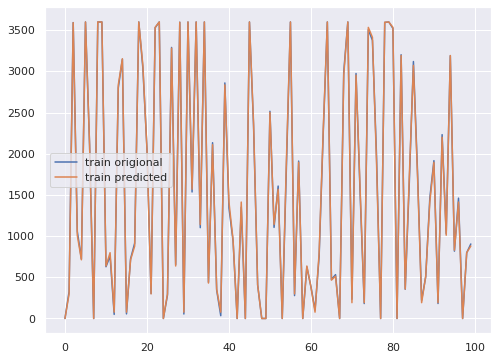

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_train[0:100], label='train origional')
plt.plot(y_gbr_predict[0:100], label='train predicted')
plt.savefig('a.jpg')
plt.legend()
plt.show()

# plotting fitting line on test data

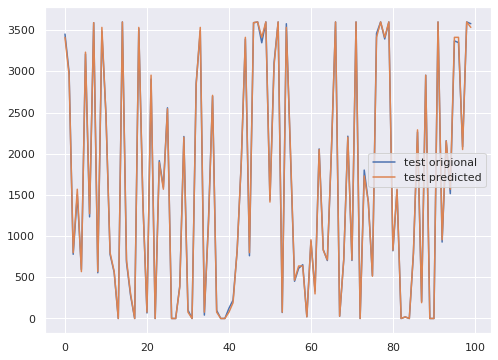

In [ ]:
plt.plot(y_test[0:100], label='test origional')
plt.plot(test_prediction[0:100], label='test predicted')
plt.savefig('b.jpg')
plt.legend()
plt.show()